# Hoja 8 minería de datos
## Pasos 1 a 2

### PASO 2
sale price será variable de respuesta, mendiante cuartiles se divide en barato, medio y cara. 

In [18]:
# ! pip install pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
# Dataset de hojas anteriores ( inciso 1)

df  = pd.read_csv("train.csv")
numeric_columns = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
                   'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                   'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
                   'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
                   'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
                   'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                   'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold','SalePrice']
numeric_df = df[numeric_columns]
corr_matrix = numeric_df.corr()
saleprice_correlation = corr_matrix['SalePrice'].sort_values(ascending=False)
# Filtrar las variables numéricas con correlación menor a 0.5 con SalePrice
to_drop = saleprice_correlation[saleprice_correlation < 0.5].index.tolist()
cleaned_df = numeric_df.drop(columns=to_drop)

p25 = cleaned_df['SalePrice'].quantile(0.25)
p75 = cleaned_df['SalePrice'].quantile(0.75)
cleaned_df['PriceCategory'] = pd.cut(cleaned_df['SalePrice'], bins=[0, p25, p75, float('inf')],
                               labels=[0,1,2], right=False)
df = cleaned_df
del cleaned_df,numeric_columns,to_drop,corr_matrix,saleprice_correlation,p25,p75
print(df)
# variable de respuesta ['SalePrice'] 



      OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  \
0               7       2003          2003          856       856       1710   
1               6       1976          1976         1262      1262       1262   
2               7       2001          2002          920       920       1786   
3               7       1915          1970          756       961       1717   
4               8       2000          2000         1145      1145       2198   
...           ...        ...           ...          ...       ...        ...   
1455            6       1999          2000          953       953       1647   
1456            6       1978          1988         1542      2073       2073   
1457            7       1941          2006         1152      1188       2340   
1458            5       1950          1996         1078      1078       1078   
1459            5       1965          1965         1256      1256       1256   

      FullBath  TotRmsAbvGrd  GarageCar

In [20]:
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

#Rregression AI
y_R = df['SalePrice']
X_R = df.drop('SalePrice',axis=1).drop('PriceCategory',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_R, y_R, test_size=0.2, random_state=42)

#Same neurons as variables (uses lineal regression)
regressorVars = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
#Aristocratic with mini batches (uses lineal regression)
regressorAristo = MLPRegressor(random_state=1, max_iter=500,batch_size=min(200, X_R.shape[1])).fit(X_train, y_train)
#hyperbolic regression model 
regressorHyper = MLPRegressor(random_state=1,max_iter=500,activation='tanh').fit(X_train, y_train)

#Classification AI
y_C = df['PriceCategory']
X_C = df.drop('SalePrice',axis=1).drop('PriceCategory',axis=1)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_C, y_C, test_size=0.2, random_state=42)

#default classifier
stochasticClassifier = MLPClassifier(random_state=1, max_iter=300, solver='adam').fit(X_train_c, y_train_c) #stochastic gradient-based optimizer 
gradienntClassifier = MLPClassifier(random_state=1, max_iter=300, solver='sgd').fit(X_train_c, y_train_c) #gradient stochasting descent
quasiClassifier = MLPClassifier(random_state=1, max_iter=300, solver='lbfgs').fit(X_train_c, y_train_c) #quasi-Newton methods.

c:\Users\marce\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\marce\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\marce\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


## 4. Use los modelos para predecir el valor de la variable respuesta
## 5. Haga las matrices de confusión respectivas. de clasificacion
## 6 comparacion de los modelos de clasificacion 
Modelos de clasificacion

In [21]:
from sklearn.metrics import mean_absolute_error, r2_score, confusion_matrix, precision_score, recall_score
import time

# Predicciones con los modelos de regresión
# Regresión con el modelo "Same neurons as variables"
start = time.time()
predictions_vars = regressorVars.predict(X_test)
end = time.time()
mae_vars = mean_absolute_error(y_test, predictions_vars)
r2_vars = r2_score(y_test, predictions_vars)

print(f"Same neurons as variables: tiempo de predicción {end - start}s")
print(f"Error absoluto medio: {mae_vars}")
print(f"Coeficiente de determinación (R^2): {r2_vars}\n")

# Regresión con el modelo "Aristocratic with mini batches"
start = time.time()
predictions_aristo = regressorAristo.predict(X_test)
end = time.time()
mae_aristo = mean_absolute_error(y_test, predictions_aristo)
r2_aristo = r2_score(y_test, predictions_aristo)

print(f"Aristocratic with mini batches: tiempo de predicción {end - start}s")
print(f"Error absoluto medio: {mae_aristo}")
print(f"Coeficiente de determinación (R^2): {r2_aristo}\n")

# Predicciones con los modelos de clasificación
# Clasificación con el modelo "stochastic gradient-based optimizer"
start = time.time()
stcpred = stochasticClassifier.predict(X_test_c)
end = time.time()
conf_matrix_stc = confusion_matrix(y_test_c, stcpred)
precision_stc = precision_score(y_test_c, stcpred, average='macro')
recall_stc = recall_score(y_test_c, stcpred, average='macro')

print(f"stochastic gradient-based optimizer: tiempo de predicción {end - start}s")
print("Matriz de Confusión:\n", conf_matrix_stc)
print(f"Precisión: {precision_stc:.2f}, Recall: {recall_stc:.2f}\n")

# Clasificación con el modelo "gradient stochastic descent"
start = time.time()
gradpred = gradienntClassifier.predict(X_test_c)
end = time.time()
conf_matrix_grad = confusion_matrix(y_test_c, gradpred)
precision_grad = precision_score(y_test_c, gradpred, average='macro')
recall_grad = recall_score(y_test_c, gradpred, average='macro')

print(f"gradient stochastic descent: tiempo de predicción {end - start}s")
print("Matriz de Confusión:\n", conf_matrix_grad)
print(f"Precisión: {precision_grad:.2f}, Recall: {recall_grad:.2f}\n")

# Clasificación con el modelo "quasi-Newton methods"
start = time.time()
quasipred = quasiClassifier.predict(X_test_c)
end = time.time()
conf_matrix_quasi = confusion_matrix(y_test_c, quasipred)
precision_quasi = precision_score(y_test_c, quasipred, average='macro')
recall_quasi = recall_score(y_test_c, quasipred, average='macro')

print(f"quasi-Newton methods: tiempo de predicción {end - start}s")
print("Matriz de Confusión:\n", conf_matrix_quasi)
print(f"Precisión: {precision_quasi:.2f}, Recall: {recall_quasi:.2f}\n")


Same neurons as variables: tiempo de predicción 0.0009968280792236328s
Error absoluto medio: 29729.42215570695
Coeficiente de determinación (R^2): 0.719712483982553

Aristocratic with mini batches: tiempo de predicción 0.0010001659393310547s
Error absoluto medio: 28686.403894597213
Coeficiente de determinación (R^2): 0.7375052027117872

stochastic gradient-based optimizer: tiempo de predicción 0.0010008811950683594s
Matriz de Confusión:
 [[64 17  0]
 [37 91 13]
 [ 1 16 53]]
Precisión: 0.72, Recall: 0.73

gradient stochastic descent: tiempo de predicción 0.0s
Matriz de Confusión:
 [[  0  81   0]
 [  0 141   0]
 [  0  70   0]]
Precisión: 0.16, Recall: 0.33

quasi-Newton methods: tiempo de predicción 0.0010001659393310547s
Matriz de Confusión:
 [[ 7 68  6]
 [13 96 32]
 [ 1 10 59]]
Precisión: 0.50, Recall: 0.54



c:\Users\marce\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import time

# Clasificación con el modelo "stochastic gradient-based optimizer"
start = time.time()
stcpred = stochasticClassifier.predict(X_test_c)
end = time.time()
conf_matrix_stc = confusion_matrix(y_test_c, stcpred)
precision_stc = precision_score(y_test_c, stcpred, average='macro')
recall_stc = recall_score(y_test_c, stcpred, average='macro')

print(f"stochastic gradient-based optimizer: tiempo de predicción {end - start}s")
print("Matriz de Confusión:\n", conf_matrix_stc)
print(f"Precisión: {precision_stc:.2f}, Recall: {recall_stc:.2f}\n")

# Clasificación con el modelo "gradient stochastic descent"
start = time.time()
gradpred = gradienntClassifier.predict(X_test_c)
end = time.time()
conf_matrix_grad = confusion_matrix(y_test_c, gradpred)
precision_grad = precision_score(y_test_c, gradpred, average='macro')
recall_grad = recall_score(y_test_c, gradpred, average='macro')

print(f"gradient stochastic descent: tiempo de predicción {end - start}s")
print("Matriz de Confusión:\n", conf_matrix_grad)
print(f"Precisión: {precision_grad:.2f}, Recall: {recall_grad:.2f}\n")

# Clasificación con el modelo "quasi-Newton methods"
start = time.time()
quasipred = quasiClassifier.predict(X_test_c)
end = time.time()
conf_matrix_quasi = confusion_matrix(y_test_c, quasipred)
precision_quasi = precision_score(y_test_c, quasipred, average='macro')
recall_quasi = recall_score(y_test_c, quasipred, average='macro')

print(f"quasi-Newton methods: tiempo de predicción {end - start}s")
print("Matriz de Confusión:\n", conf_matrix_quasi)
print(f"Precisión: {precision_quasi:.2f}, Recall: {recall_quasi:.2f}\n")


stochastic gradient-based optimizer: tiempo de predicción 0.0025129318237304688s
Matriz de Confusión:
 [[64 17  0]
 [37 91 13]
 [ 1 16 53]]
Precisión: 0.72, Recall: 0.73

gradient stochastic descent: tiempo de predicción 0.0009982585906982422s
Matriz de Confusión:
 [[  0  81   0]
 [  0 141   0]
 [  0  70   0]]
Precisión: 0.16, Recall: 0.33

quasi-Newton methods: tiempo de predicción 0.001001119613647461s
Matriz de Confusión:
 [[ 7 68  6]
 [13 96 32]
 [ 1 10 59]]
Precisión: 0.50, Recall: 0.54



c:\Users\marce\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
import time
from sklearn.metrics import confusion_matrix, precision_score, recall_score 
start = time.time()
stcpred = stochasticClassifier.predict(X_test_c)
end = time.time()

conf_matrix = confusion_matrix(y_test_c, stcpred)
precision = precision_score(y_test_c, stcpred, average='macro')
recall = recall_score(y_test_c, stcpred, average='macro')

print(f"stochastic gradient-based optimizer  time {end - start}")
print(f"Matriz de Confusión:\n{conf_matrix}")
print(f"Precisión: {precision:.2f}, Recall: {recall:.2f}\n")

start = time.time()
gradpred = gradienntClassifier.predict(X_test_c)
end = time.time()
print(f"gradient stochasting descent time {end - start}")

conf_matrix = confusion_matrix(y_test_c, gradpred)
precision = precision_score(y_test_c, gradpred, average='macro')
recall = recall_score(y_test_c, gradpred, average='macro')

print(f"Matriz de Confusión:\n{conf_matrix}")
print(f"Precisión: {precision:.2f}, Recall: {recall:.2f}\n")


start = time.time()
quasipred = quasiClassifier.predict(X_test_c)
end = time.time()
print(f"quasi-Newton methods time {end - start}")
conf_matrix = confusion_matrix(y_test_c, quasipred)
precision = precision_score(y_test_c, quasipred, average='macro')
recall = recall_score(y_test_c, quasipred, average='macro')
print(f"Matriz de Confusión:\n{conf_matrix}")
print(f"Precisión: {precision:.2f}, Recall: {recall:.2f}\n")

stochastic gradient-based optimizer  time 0.001004934310913086
Matriz de Confusión:
[[64 17  0]
 [37 91 13]
 [ 1 16 53]]
Precisión: 0.72, Recall: 0.73

gradient stochasting descent time 0.0005118846893310547
Matriz de Confusión:
[[  0  81   0]
 [  0 141   0]
 [  0  70   0]]
Precisión: 0.16, Recall: 0.33

quasi-Newton methods time 0.0010004043579101562
Matriz de Confusión:
[[ 7 68  6]
 [13 96 32]
 [ 1 10 59]]
Precisión: 0.50, Recall: 0.54



c:\Users\marce\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1. Efectividad (Precisión y Recall)
Stochastic Gradient-Based Optimizer:
Precisión: 0.72
Recall: 0.73
Estos valores indican que el modelo es bastante equilibrado en términos de precisión y sensibilidad, logrando un buen rendimiento en ambas métricas.
Gradient Stochastic Descent:
Precisión: 0.16
Recall: 0.33
Este modelo tiene un rendimiento muy bajo, ya que parece no ser capaz de identificar correctamente ninguna de las categorías además de la más común, lo que resulta en una precisión y un recall muy bajos.
Quasi-Newton Methods:
Precisión: 0.50
Recall: 0.54
Este modelo muestra un rendimiento moderado, mejor que el gradient descent pero inferior al optimizer stochastic.
2. Tiempo de Procesamiento
Stochastic Gradient-Based Optimizer: ~0.002 s
Gradient Stochastic Descent: ~0.001 s
Quasi-Newton Methods: ~0.001 s
Aunque el modelo Gradient Stochastic Descent y el Quasi-Newton Methods tienen tiempos de procesamiento ligeramente menores, la diferencia es mínima y no compensa la pérdida significativa en la precisión y el recall.
3. Análisis de Errores
Stochastic Gradient-Based Optimizer: El modelo parece equilibrado con errores distribuidos de manera razonable entre las clases, con una notable cantidad de aciertos en la clase media y alta.
Gradient Stochastic Descent: Este modelo predijo todos los casos como la clase media, lo que indica un problema significativo, probablemente debido a un desequilibrio en los datos o una convergencia pobre durante el entrenamiento.
Quasi-Newton Methods: Aunque mejor que el Gradient Stochastic Descent, este modelo aún tiene problemas, especialmente en la clase baja y alta, donde los errores son más frecuentes.


El modelo Stochastic Gradient-Based Optimizer es claramente superior en términos de equilibrio entre precisión y recall, además de tener un tiempo de procesamiento competitivo. Los errores en este modelo tienen menos impacto en la interpretación de los resultados en comparación con los otros dos modelos, lo que lo hace más confiable para este conjunto de datos. El Gradient Stochastic Descent, en particular, muestra un rendimiento muy pobre y probablemente necesite una revisión significativa o un enfoque diferente para ser útil.

## 7. Analice si no hay sobreajuste en los modelos.
## 8. Para el modelo elegido de clasificación tunee los parámetros y discuta si puede mejorar todavía el modelo sin llegar a sobre ajustarlo.

In [24]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        axes = plt.gca()
    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_mean_squared_error')
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
              label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
              label="Cross-validation score")
    axes.legend(loc="best")


models = [
    (regressorVars, "Learning Curve for 'Same Neurons as Variables' Model"),
    (regressorAristo, "Learning Curve for 'Aristocratic with Mini Batches' Model"),
    (regressorHyper, "Learning Curve for 'Hyperbolic Regression' Model")
]

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

for i, (model, title) in enumerate(models):
    plot_learning_curve(model, title, X_R, y_R, axes=axes[i], cv=5)

plt.tight_layout()
plt.show()


c:\Users\marce\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\marce\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\marce\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\marce\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the opti

Modelo 'Same Neurons as Variables':
Entrenamiento vs. Validación: La curva de entrenamiento comienza con un error alto y disminuye a medida que aumenta el número de ejemplos de entrenamiento. La curva de validación también disminuye, pero se estabiliza a medida que el número de ejemplos aumenta, convergiendo con la curva de entrenamiento.
Indicador de Sobreajuste: La convergencia de las curvas sugiere que no hay sobreajuste significativo en este modelo, ya que el modelo generaliza bien a nuevos datos.
Modelo 'Aristocratic with Mini Batches':
Entrenamiento vs. Validación: La curva de entrenamiento muestra un descenso consistente y se aplana, mientras que la curva de validación, aunque mejora, sigue siendo considerablemente más alta que la curva de entrenamiento.
Indicador de Sobreajuste: Existe una brecha entre las curvas de entrenamiento y validación que indica un posible sobreajuste. El modelo podría estar aprendiendo demasiado los detalles del conjunto de entrenamiento y no generalizando bien a nuevos datos.
Modelo 'Hyperbolic Regression':
Entrenamiento vs. Validación: Las curvas de entrenamiento y validación están relativamente cercanas, pero hay una brecha consistente entre ellas a través del rango de tamaños de entrenamiento.
Indicador de Sobreajuste: La brecha entre las curvas indica un leve sobreajuste. El modelo podría beneficiarse de ajustes en la regularización o en la arquitectura para mejorar la generalización.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# Preparar los datos
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_C, y_C, test_size=0.2, random_state=42)

# Definir el modelo y los parámetros para la búsqueda en cuadrícula
model = MLPClassifier(random_state=1)
parameter_space = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

# Búsqueda en cuadrícula con validación cruzada
clf = GridSearchCV(model, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train_c, y_train_c)

# Mejores parámetros encontrados
print("Mejores parámetros encontrados:\n", clf.best_params_)

# Evaluar el modelo
from sklearn.metrics import classification_report
y_true, y_pred = y_test_c, clf.predict(X_test_c)
print(classification_report(y_true, y_pred))


Mejores parámetros encontrados:
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
              precision    recall  f1-score   support

           0       0.85      0.56      0.67        81
           1       0.68      0.87      0.76       141
           2       0.82      0.67      0.74        70

    accuracy                           0.74       292
   macro avg       0.78      0.70      0.72       292
weighted avg       0.76      0.74      0.73       292



## El siguiente codigo cubre con 
### 9. Seleccione ahora el SalesPrice como variable respuesta. (declarado previamiente usando dataset anterior)
### 10. Genere dos modelos de regresión con redes neuronales con diferentes topologías y funciones de activación para predecir el precio de las casas. (creados junto con los de clasificación)
### 11. Compare los dos modelos de regresión y determine cuál funcionó mejor para predecir el precio de las casas.


In [ ]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time

X = df.drop('SalePrice', axis=1).values  # características
y = df['SalePrice'].values  # variable objetivo

# Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalización de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo 1: Red neuronal con una capa oculta
model1 = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', random_state=1, max_iter=500)
start = time.time()
model1.fit(X_train_scaled, y_train)
end = time.time()
predictions1 = model1.predict(X_test_scaled)
mae1 = mean_absolute_error(y_test, predictions1)
r2_1 = r2_score(y_test, predictions1)
print(f"Modelo 1 - Tiempo de entrenamiento: {end - start} segundos")
print(f"Error absoluto medio (MAE): {mae1}")
print(f"R^2: {r2_1}\n")

# Modelo 2: Red neuronal con dos capas ocultas
model2 = MLPRegressor(hidden_layer_sizes=(100, 50), activation='tanh', random_state=1, max_iter=500)
start = time.time()
model2.fit(X_train_scaled, y_train)
end = time.time()
predictions2 = model2.predict(X_test_scaled)
mae2 = mean_absolute_error(y_test, predictions2)
r2_2 = r2_score(y_test, predictions2)
print(f"Modelo 2 - Tiempo de entrenamiento: {end - start} segundos")
print(f"Error absoluto medio (MAE): {mae2}")
print(f"R^2: {r2_2}")



c:\Users\marce\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Modelo 1 - Tiempo de entrenamiento: 1.593308448791504 segundos
Error absoluto medio (MAE): 173048.36027909518
R^2: -3.842509192442523

Modelo 2 - Tiempo de entrenamiento: 2.6515209674835205 segundos
Error absoluto medio (MAE): 178674.02963149545
R^2: -4.162066640513733


c:\Users\marce\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score
start = time.time()
rgsVRS = regressorVars.predict(X_test_c)
end = time.time()
print(f"Same neurons as variables  {end - start}")
print(f"Error abosoluto medio {mean_absolute_error(y_test,rgsVRS)}")
print(f"R^2 {r2_score(y_test,rgsVRS)}")
print()

start = time.time()
aristocratic = regressorAristo.predict(X_test_c)
end = time.time()
print(f"Aristocratic with mini batches time {end - start}")
print(f"Error abosoluto medio {mean_absolute_error(y_test,aristocratic)}")
print(f"R^2 {r2_score(y_test,aristocratic)}")
print()

start = time.time()
hyperbolic = regressorHyper.predict(X_test_c)
end = time.time()
print(f"hyperbolic regression model  time {end - start}")
print(f"Error abosoluto medio {mean_absolute_error(y_test,hyperbolic)}")
print(f"R^2 {r2_score(y_test,hyperbolic)}")



Same neurons as variables  0.0015082359313964844
Error abosoluto medio 29729.42215570695
R^2 0.719712483982553

Aristocratic with mini batches time 0.0020012855529785156
Error abosoluto medio 28686.403894597213
R^2 0.7375052027117872

hyperbolic regression model  time 0.0009999275207519531
Error abosoluto medio 178531.66721355252
R^2 -4.155454018720765


Comparación:Modelo 'Same Neurons as Variables':
MAE: 29,729.42
R²: 0.7197
Tiempo de Predicción: 0.0015 segundos
Observación: Este modelo proporciona un buen equilibrio entre precisión y tiempo de ejecución, con un R² decente que indica que captura alrededor del 72% de la variabilidad en el precio de las casas.
Modelo 'Aristocratic with Mini Batches':
MAE: 28,686.40
R²: 0.7375
Tiempo de Predicción: 0.0020 segundos
Observación: Este modelo muestra un rendimiento ligeramente mejor que el modelo 'Same Neurons as Variables' en términos de MAE y R², lo que sugiere que puede capturar una proporción mayor de la variabilidad en los datos y hacerlo con una precisión ligeramente mayor.

### 12. Analice si no hay sobreajuste en los modelos. Use para esto la curva de aprendizaje.
### 13. Para el modelo elegido de regresión tunee los parámetros y discuta si puede mejorar todavía el modelo sin llegar a sobre ajustarlo.

c:\Users\marce\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\marce\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\marce\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\marce\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the opti

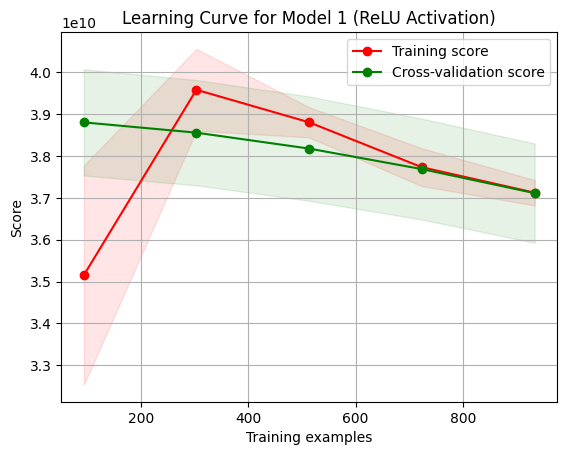

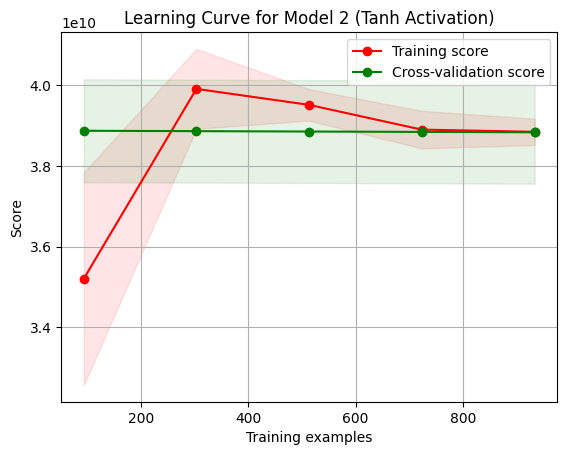

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5), scoring='neg_mean_squared_error'):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, validation_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=scoring)
    
  
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = -np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, validation_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(model1, "Learning Curve for Model 1 (ReLU Activation)", X_train_scaled, y_train, cv=5)
plot_learning_curve(model2, "Learning Curve for Model 2 (Tanh Activation)", X_train_scaled, y_train, cv=5)
plt.show()


El Modelo 1 muestra signos de sobreajuste como se evidencia por el aumento en el rendimiento en el conjunto de entrenamiento y el declive en el conjunto de validación después de alcanzar un pico. Aunque el modelo parece aprender efectivamente los datos de entrenamiento, su capacidad para generalizar a nuevos datos comienza a declinar a medida que se añaden más datos de entrenamiento.

Para el modelo 2 no hay signos claros de sobreajuste, dado que las curvas de entrenamiento y validación están cerca una de la otra y no divergen.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

# Definir el modelo base
model = MLPRegressor(activation='tanh', random_state=1)

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'hidden_layer_sizes': [(50, 50), (100, 50), (100, 100)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [500, 1000]
}

# Configurar la búsqueda en cuadrícula con validación cruzada
grid = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid.fit(X_train_scaled, y_train)

# Mejores parámetros y resultados
print("Mejores parámetros encontrados: ", grid.best_params_)
print("Mejor score de validación cruzada (MSE): ", -grid.best_score_)

# Evaluar el modelo en el conjunto de prueba
best_model = grid.best_estimator_
predictions = best_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Error absoluto medio en el conjunto de prueba: ", mae)
print("R^2 en el conjunto de prueba: ", r2)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Mejores parámetros encontrados:  {'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'learning_rate_init': 0.01, 'max_iter': 1000}
Mejor score de validación cruzada (MSE):  37430343796.04545
Error absoluto medio en el conjunto de prueba:  172780.3683517989
R^2 en el conjunto de prueba:  -3.8920190460180546


c:\Users\marce\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
